# UMAP diversity

#### Plotting the UMAP projection of the subset of synthetic and real data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from scipy.spatial.distance import cdist
from tqdm.notebook import tqdm
import pickle
import h5py

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load UMAP projection
u_fake = np.load('./diversity_saves/umap_synth_1k_large.npy', allow_pickle=True)
u_real = np.load('./diversity_saves/umap_real_1k_large.npy', allow_pickle=True)

In [3]:
# Load synthetic region labels
h5f = h5py.File('./diversity_saves/synth_set.h5', 'r')
synth_region = h5f['regions'][:1000]
h5f.close()

In [4]:
# Load training region labels
h5f = h5py.File('./diversity_saves/train_set.h5', 'r')
train_region = h5f['regions'][3000:4000]
h5f.close()

In [5]:
# Split training by region
index_0 = np.array(train_region == 0.0).flatten()
index_1 = np.array(train_region == 1.0).flatten()
index_2 = np.array(train_region == 2.0).flatten()
u_r_0 = u_real[index_0]
u_r_1 = u_real[index_1]
u_r_2 = u_real[index_2]

In [6]:
# Split synthetic by region
index_0 = np.array(synth_region == 0.0).flatten()
index_1 = np.array(synth_region == 1.0).flatten()
index_2 = np.array(synth_region == 2.0).flatten()
u_f_0 = u_fake[index_0]
u_f_1 = u_fake[index_1]
u_f_2 = u_fake[index_2]

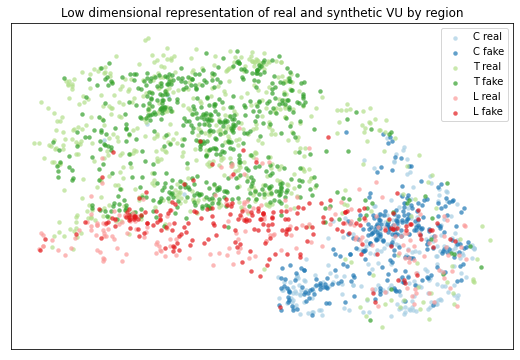

In [7]:
# Plot figure with different color for each 
plt.figure(figsize=(9, 6))
cmap = plt.get_cmap("Paired")

plt.scatter(u_r_0[:,0], u_r_0[:,1], s = 20, alpha=0.7, color=cmap(0), facecolor=cmap(0), linewidth=0, label='C real')
plt.scatter(u_f_0[:,0], u_f_0[:,1], s = 20, alpha=0.7, color=cmap(1), facecolor=cmap(1), linewidth=0, label='C fake')


plt.scatter(u_r_1[:,0], u_r_1[:,1], s = 20, alpha=0.7, color=cmap(2), facecolor=cmap(2), linewidth=0, label='T real')
plt.scatter(u_f_1[:,0], u_f_1[:,1], s = 20, alpha=0.7, color=cmap(3), facecolor=cmap(3), linewidth=0, label='T fake')


plt.scatter(u_r_2[:,0], u_r_2[:,1], s = 20, alpha=0.7, color=cmap(4), facecolor=cmap(4), linewidth=0, label='L real')
plt.scatter(u_f_2[:,0], u_f_2[:,1], s = 20, alpha=0.7, color=cmap(5), facecolor=cmap(5), linewidth=0, label='L fake')

plt.title('Low dimensional representation of real and synthetic VU by region')
plt.legend()
# One single outlier shrinks the scale, recenter on 99.95% of the points
plt.ylim([-4, 4])
plt.xticks([])
plt.yticks([])
plt.savefig('./images/Region_trained.png', dpi=300, bbox='tight')

### With outlier

([], [])

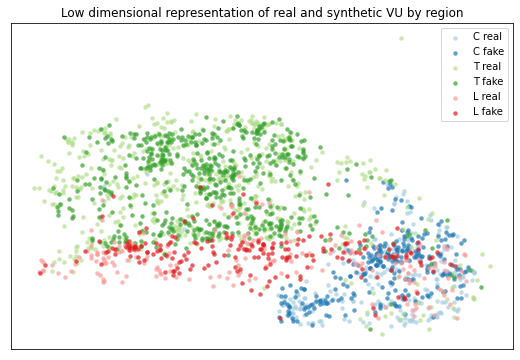

In [8]:
# Plot figure with different color for each
# One single outlier shrinks the scale

plt.figure(figsize=(9, 6))
cmap = plt.get_cmap("Paired")

plt.scatter(u_r_0[:,0], u_r_0[:,1], s = 20, alpha=0.7, color=cmap(0), facecolor=cmap(0), linewidth=0, label='C real')
plt.scatter(u_f_0[:,0], u_f_0[:,1], s = 20, alpha=0.7, color=cmap(1), facecolor=cmap(1), linewidth=0, label='C fake')


plt.scatter(u_r_1[:,0], u_r_1[:,1], s = 20, alpha=0.7, color=cmap(2), facecolor=cmap(2), linewidth=0, label='T real')
plt.scatter(u_f_1[:,0], u_f_1[:,1], s = 20, alpha=0.7, color=cmap(3), facecolor=cmap(3), linewidth=0, label='T fake')


plt.scatter(u_r_2[:,0], u_r_2[:,1], s = 20, alpha=0.7, color=cmap(4), facecolor=cmap(4), linewidth=0, label='L real')
plt.scatter(u_f_2[:,0], u_f_2[:,1], s = 20, alpha=0.7, color=cmap(5), facecolor=cmap(5), linewidth=0, label='L fake')

plt.title('Low dimensional representation of real and synthetic VU by region')
plt.legend()
plt.xticks([])
plt.yticks([])